<a href="https://colab.research.google.com/github/MahdiZaman/Spring2019-CAP5610/blob/master/hw1p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28*28,)))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 1.2841 - acc: 0.6991 - val_loss: 0.8107 - val_acc: 0.8343
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.7134 - acc: 0.8431 - val_loss: 0.6074 - val_acc: 0.8606
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.5850 - acc: 0.8603 - val_loss: 0.5255 - val_acc: 0.8732
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.5237 - acc: 0.8689 - val_loss: 0.4800 - val_acc: 0.8813
Epoch 5/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.4865 - acc: 0.8759 - val_loss: 0.4504 - val_acc: 0.8856
Epoch 6/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.4608 - acc: 0.8803 - val_loss: 0.4294 - val_acc: 0.8886
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

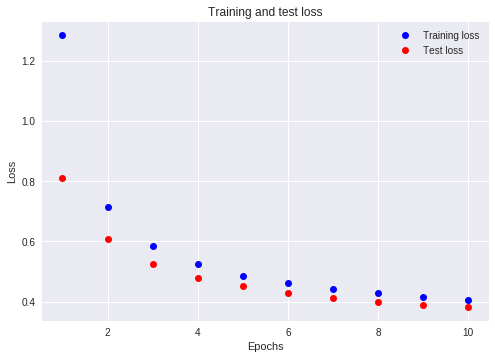

In [8]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

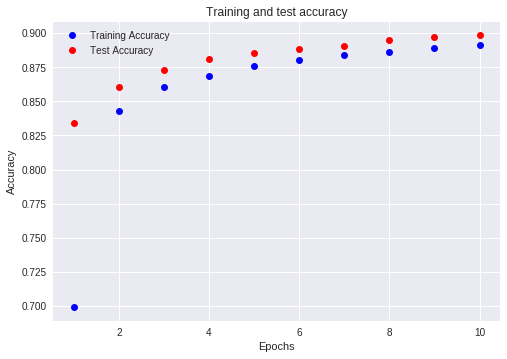

In [9]:
plt.plot(epochs_range, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test Accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()